In [1]:
pip install -U finance-datareader

In [2]:
import numpy as np
import pandas as pd
import FinanceDataReader as fdr
import matplotlib.pyplot as plt

In [3]:
# 코스피 전체 종목 불러오기
B = fdr.StockListing('KOSPI')

In [4]:
# 결측값 제거
B_1 = B.dropna()
len(B_1)

782

In [5]:
B_1

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
1,095570,KOSPI,AJ네트웍스,산업용 기계 및 장비 임대업,"렌탈(파렛트, OA장비, 건설장비)",2015-08-21,12월,박대현,http://www.ajnet.co.kr,서울특별시
2,006840,KOSPI,AK홀딩스,기타 금융업,지주사업,1999-08-11,12월,"채형석, 이석주(각자 대표이사)",http://www.aekyunggroup.co.kr,서울특별시
50,027410,KOSPI,BGF,기타 금융업,지주회사,2014-05-19,12월,홍정국,http://www.bgf.co.kr,서울특별시
51,282330,KOSPI,BGF리테일,종합 소매업,체인화 편의점,2017-12-08,12월,이건준,http://www.bgfretail.com,서울특별시
53,138930,KOSPI,BNK금융지주,기타 금융업,금융지주회사,2011-03-30,12월,김지완,http://www.bnkfg.com,부산광역시
...,...,...,...,...,...,...,...,...,...,...
7608,079980,KOSPI,휴비스,화학섬유 제조업,"합성섬유(폴리에스테르원사,원면),재생섬유,폴리에스텔 원사,원면,고상칩 제조,도소매",2012-02-23,12월,신유동,http://www.huvis.com,서울특별시
7611,005010,KOSPI,휴스틸,1차 철강 제조업,"강관(배관용,구조용,유정용) 제조,도매",1973-06-29,12월,박훈,http://www.husteel.com,서울특별시
7616,069260,KOSPI,휴켐스,기타 화학제품 제조업,"화합물,화학제품 제조",2002-10-07,12월,이건호,http://www.huchems.com,서울특별시
7620,000540,KOSPI,흥국화재,보험업,손해보험,1974-12-05,12월,권중원,http://www.insurance.co.kr,서울특별시


In [6]:
# 티커를 리스트로 만들기
B_2 = list(B_1.loc[:, 'Symbol'])
B_2

['095570',
 '006840',
 '027410',
 '282330',
 '138930',
 '001460',
 '001040',
 '079160',
 '000120',
 '011150',
 '097950',
 '000590',
 '012030',
 '016610',
 '005830',
 '000990',
 '139130',
 '001530',
 '000210',
 '001880',
 '004840',
 '155660',
 '069730',
 '017940',
 '365550',
 '383220',
 '007700',
 '114090',
 '006360',
 '001250',
 '007070',
 '012630',
 '039570',
 '089470',
 '294870',
 '097230',
 '011200',
 '082740',
 '003560',
 '175330',
 '234080',
 '001060',
 '096760',
 '105560',
 '002380',
 '344820',
 '009070',
 '009440',
 '119650',
 '092220',
 '016380',
 '001390',
 '033180',
 '001940',
 '025000',
 '092230',
 '000040',
 '030200',
 '033780',
 '030210',
 '058850',
 '058860',
 '093050',
 '003550',
 '034220',
 '051900',
 '032640',
 '011070',
 '066570',
 '037560',
 '051910',
 '079550',
 '006260',
 '010120',
 '000680',
 '001120',
 '108670',
 '383800',
 '023150',
 '035420',
 '181710',
 '400760',
 '005940',
 '338100',
 '034310',
 '008260',
 '004250',
 '010060',
 '178920',
 '005490',
 '010950',

In [7]:
df = []
df_1 = []
df_2 = []
df_3 = []
df_4 = []
df_5 = []
df_6 = []
df_7 = []

In [8]:
for i in B_2 : 
  df = fdr.DataReader(i)
  df = df.assign(ticker = i) # 티커열 추가
  df = df.assign(#ma5=df['Close'].rolling(window=5).mean(), 정배열 유무 위한 추가 가능
                 ma20=df['Close'].rolling(window=20).mean(),
               #ma60=df['Close'].rolling(window=60).mean(),
               #ma120=df['Close'].rolling(window=120).mean(),
                 stddev=df['Close'].rolling(window=20).std())
  df = df.assign(upper=df['ma20'] + df['stddev']*2,
               lower=df['ma20'] - df['stddev']*2)
  df = df.assign(PB=(df['Close']-df['lower']) / (df['upper']-df['lower']), # 상하한선 이탈
               BW=(df['upper']-df['lower'])/df['ma20'])                    # 밴드폭
  df = df.assign(a = (df['ma20'].values[-1]  - df['ma20'].values[-2]) / 2 ) # 최근 기울기로 상승세 알아보기 위함
  df = df[['ticker', 'Open',	'High',	'Low',	'Close',	'Volume',	'Change',
         #'ma5',	
         'ma20',
         #'ma60',	
         #'ma120',	
         'stddev',	'upper',	'lower',	'PB',	'BW',	'a']]

  df = df.iloc[-5 :] # periods
  df_1 = df[(df['BW'] < 0.1)] # 밴드폭
  
  df_2 = df_1[(df_1['PB'] < 0)] # 최근 기간동안 하한밴드 돌파여부 확인 및 다른 조건 추가 가능

  df_2 = df_2.drop_duplicates(['ticker'], keep = 'last') # 여러개 행들 중에서 마지막 한개만 남김
  
  df_4 = df_2.append(df_4) # 행들을 겹치게 함
    
  print(df_4)

Empty DataFrame
Columns: [ticker, Open, High, Low, Close, Volume, Change, ma20, stddev, upper, lower, PB, BW, a]
Index: []
Empty DataFrame
Columns: [ticker, Open, High, Low, Close, Volume, Change, ma20, stddev, upper, lower, PB, BW, a]
Index: []
Empty DataFrame
Columns: [ticker, Open, High, Low, Close, Volume, Change, ma20, stddev, upper, lower, PB, BW, a]
Index: []
Empty DataFrame
Columns: [ticker, Open, High, Low, Close, Volume, Change, ma20, stddev, upper, lower, PB, BW, a]
Index: []
Empty DataFrame
Columns: [ticker, Open, High, Low, Close, Volume, Change, ma20, stddev, upper, lower, PB, BW, a]
Index: []
Empty DataFrame
Columns: [ticker, Open, High, Low, Close, Volume, Change, ma20, stddev, upper, lower, PB, BW, a]
Index: []
Empty DataFrame
Columns: [ticker, Open, High, Low, Close, Volume, Change, ma20, stddev, upper, lower, PB, BW, a]
Index: []
Empty DataFrame
Columns: [ticker, Open, High, Low, Close, Volume, Change, ma20, stddev, upper, lower, PB, BW, a]
Index: []
Empty DataFrame


In [9]:
df_4.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1 entries, 2022-02-22 to 2022-02-22
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ticker  1 non-null      object 
 1   Open    1 non-null      int64  
 2   High    1 non-null      int64  
 3   Low     1 non-null      int64  
 4   Close   1 non-null      int64  
 5   Volume  1 non-null      int64  
 6   Change  1 non-null      float64
 7   ma20    1 non-null      float64
 8   stddev  1 non-null      float64
 9   upper   1 non-null      float64
 10  lower   1 non-null      float64
 11  PB      1 non-null      float64
 12  BW      1 non-null      float64
 13  a       1 non-null      float64
dtypes: float64(8), int64(5), object(1)
memory usage: 120.0+ bytes


In [10]:
df_4.loc[:,['ticker']] # 종목 티커 정리

,ticker
Date,
2022-02-22,204210


In [11]:
df_5 = list(df_4.loc[:, 'ticker']) # 종목 티커를 볼린저 밴드로 시각화 위해 리스트로 변환
df_5

['204210']

In [12]:
# 조건에 맞는 종목들을 살펴보기 위함
df_8=[]
for i in df_5 : 
  df_6 = fdr.StockListing('KOSPI')
  df_7 = df_6.loc[(df_6['Symbol'] == i)]
  df_8 = df_7.append(df_8) 

In [13]:
# 조건에 맞는 종목들을 데이터 프레임으로 출력
df_8

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
2446,204210,KOSPI,모두투어리츠,부동산 임대 및 공급업,"호텔 부동산 취득, 관리, 개량 및 처분",2016-09-22,12월,최동주,http://www.modetourreit.com,서울특별시


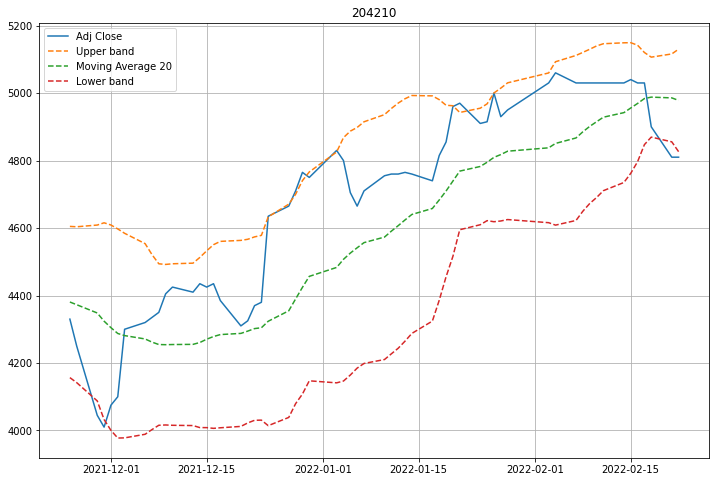

In [14]:
# 종목들을 볼린저 밴드로 시각화 하여 투자 여부를 결정
for i in df_5 : 
  df = fdr.DataReader(i)
  df = df.assign(ticker = i)
  df = df.assign(#ma5=df['Close'].rolling(window=5).mean(),
                 ma20=df['Close'].rolling(window=20).mean(),
               #ma60=df['Close'].rolling(window=60).mean(),
               #ma120=df['Close'].rolling(window=120).mean(),
                 stddev=df['Close'].rolling(window=20).std())
  df = df.assign(upper=df['ma20'] + df['stddev']*2,
               lower=df['ma20'] - df['stddev']*2)
  df = df.iloc[-60:] # periods

  plt.figure(figsize=(12, 8))
  plt.title(i)
  plt.grid(True)
  plt.plot(df.index, df['Close'], label='Adj Close')
  plt.plot(df.index, df['upper'], linestyle='dashed', label='Upper band')
  plt.plot(df.index, df['ma20'], linestyle='dashed', label='Moving Average 20')
  plt.plot(df.index, df['lower'], linestyle='dashed', label='Lower band')
  plt.legend(loc='best'); 
 